### Copyright 2026 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Selecting k-th element in an array using quickselect and output of some statistics

In [1]:
# main function to be called for selecting the k-th element in the complete array
# this code contains counters for outputting statistics
# the counters are incremented after the action to be counted happened
def select(a, k, outputStats=True):
    global quickselect_calls, partition_calls, comparison_indexes, comparison_keys, exchange_keys, assignment_key, exec_for_loop
    # initialization of counters
    quickselect_calls = 0
    partition_calls = 0
    comparison_indexes = 0
    comparison_keys = 0
    exchange_keys = 0
    assignment_key = 0
    exec_for_loop = 0
        
    element = quickselect(a, 0, len(a)-1, k)
    
    if outputStats:
        # output of counters, "# ..." means "number of ..."
        print(TEXT_SPACING, "# keys in array =", len(a))
        print(TEXT_SPACING, "# calls of quickselect =", quickselect_calls)
        print(TEXT_SPACING, "# calls of partition =", partition_calls)
        print(TEXT_SPACING, "# comparisons of two indexes =", comparison_indexes)
        print(TEXT_SPACING, "# comparisons of two keys =", comparison_keys)
        print(TEXT_SPACING, "# exchanges of two keys =", exchange_keys)
        print(TEXT_SPACING, "# assignment of one key =", assignment_key)
        print(TEXT_SPACING, "# executions for-loop =", exec_for_loop)
    return a, element, quickselect_calls, partition_calls, comparison_indexes, comparison_keys, exchange_keys, assignment_key, exec_for_loop

In [2]:
def quickselect(a, left, right, k):
    global quickselect_calls, partition_calls, comparison_indexes
    quickselect_calls += 1
    partition_calls += 1
    pos_pivot = partition(a, left, right)
    comparison_indexes += 1 # first comparison
    if k == pos_pivot:
        return a[k]
    elif k < pos_pivot:
        comparison_indexes += 1 # second comparison
        return quickselect(a, left, pos_pivot-1, k)
    else:
        comparison_indexes += 1 # also second comparison
        return quickselect(a, pos_pivot+1, right, k)

In [3]:
def partition(a, left, right):
    global comparison_keys, exchange_keys, assignment_key, exec_for_loop
    # pivot element is the element at right side of part to be sorted
    pivot = a[right]
    assignment_key += 1
    i = left-1
    for j in range(left, right):
        exec_for_loop += 1
        comparison_keys += 1
        if a[j] <= pivot:
            i = i+1
            a[i], a[j] = a[j], a[i]
            exchange_keys += 1
    a[i+1], a[right] = a[right], a[i+1]
    exchange_keys += 1
    # return position of pivot element
    return i+1

## Global variables for easier information exchange between functions

In [4]:
quickselect_calls = 0
partition_calls = 0
comparison_keys = 0
comparison_indexes = 0
exchange_keys = 0 # two assignments
assignment_key = 0 # one assignment
exec_for_loop = 0

## Constants

In [5]:
# The size of array in tests can be changed here
ARRAY_SIZE = 10
# Some output text
TEXT_BEFORE_SELECTING = "Before selecting:"
TEXT_AFTER_SELECTING = "After  selecting:"
TEXT_FOUND = "Found element:"
TEXT_SEARCH = "Search for k-smallest element with k ="
TEXT_SPACING = " "*len(TEXT_BEFORE_SELECTING)

## Generate test data and test algorithm

In [6]:
# test for selecting in sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SELECTING, sorted_array)
print(TEXT_FOUND, select(sorted_array, 5)[1])
print(TEXT_AFTER_SELECTING, sorted_array)

Before selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                  # keys in array = 10
                  # calls of quickselect = 5
                  # calls of partition = 5
                  # comparisons of two indexes = 9
                  # comparisons of two keys = 35
                  # exchanges of two keys = 40
                  # assignment of one key = 5
                  # executions for-loop = 35
Found element: 5
After  selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
# test for selecting in reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SELECTING, reverse_sorted_array)
print(TEXT_FOUND, select(reverse_sorted_array, 0)[1])
print(TEXT_AFTER_SELECTING, reverse_sorted_array)

Before selecting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
                  # keys in array = 10
                  # calls of quickselect = 1
                  # calls of partition = 1
                  # comparisons of two indexes = 1
                  # comparisons of two keys = 9
                  # exchanges of two keys = 1
                  # assignment of one key = 1
                  # executions for-loop = 9
Found element: 0
After  selecting: [0, 8, 7, 6, 5, 4, 3, 2, 1, 9]


In [8]:
# test for selecting in reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SELECTING, reverse_sorted_array)
print(TEXT_FOUND, select(reverse_sorted_array, 5)[1])
print(TEXT_AFTER_SELECTING, reverse_sorted_array)

Before selecting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
                  # keys in array = 10
                  # calls of quickselect = 10
                  # calls of partition = 10
                  # comparisons of two indexes = 19
                  # comparisons of two keys = 45
                  # exchanges of two keys = 30
                  # assignment of one key = 10
                  # executions for-loop = 45
Found element: 5
After  selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
# test for selecting in reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SELECTING, reverse_sorted_array)
print(TEXT_FOUND, select(reverse_sorted_array, 9)[1])
print(TEXT_AFTER_SELECTING, reverse_sorted_array)

Before selecting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
                  # keys in array = 10
                  # calls of quickselect = 2
                  # calls of partition = 2
                  # comparisons of two indexes = 3
                  # comparisons of two keys = 17
                  # exchanges of two keys = 10
                  # assignment of one key = 2
                  # executions for-loop = 17
Found element: 9
After  selecting: [0, 8, 7, 6, 5, 4, 3, 2, 1, 9]


In [10]:
# test for selecting in random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test selecting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SELECTING, array)
k = numpy.random.randint(ARRAY_SIZE)
print(TEXT_SEARCH, k)
print(TEXT_FOUND, select(array, k)[1])
print(TEXT_AFTER_SELECTING, array)

Before selecting: [np.int32(2), np.int32(8), np.int32(4), np.int32(9), np.int32(1), np.int32(6), np.int32(7), np.int32(3), np.int32(0), np.int32(5)]
Search for k-smallest element with k = 4
                  # keys in array = 10
                  # calls of quickselect = 4
                  # calls of partition = 4
                  # comparisons of two indexes = 7
                  # comparisons of two keys = 17
                  # exchanges of two keys = 11
                  # assignment of one key = 4
                  # executions for-loop = 17
Found element: 4
After  selecting: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(7), np.int32(9), np.int32(8), np.int32(6)]


### Your tests here ...

In [11]:
array = [1,3,2]
print(TEXT_BEFORE_SELECTING, array)
print(TEXT_FOUND, select(array, 0)[1])
print(TEXT_AFTER_SELECTING, array)

Before selecting: [1, 3, 2]
                  # keys in array = 3
                  # calls of quickselect = 2
                  # calls of partition = 2
                  # comparisons of two indexes = 3
                  # comparisons of two keys = 2
                  # exchanges of two keys = 3
                  # assignment of one key = 2
                  # executions for-loop = 2
Found element: 1
After  selecting: [1, 2, 3]


In [12]:
# ... and here ...

## Output of statistics to understand the behavior of algorithm

In [13]:
# for visualization we make use of pyplot
import matplotlib.pyplot as plt
# used for comparison
import math

## Constants

In [14]:
# The values of the array sizes in tests can be changed here
ARRAY_SIZES = list(range(10,201,10))
# output factor for scaling up for visibility
FACTOR_COMPARISON = 1000

## Plot the number of executions of for loop and compare it with other behaviors

In [15]:
def plot_results(results):
    plt.figure(figsize=(15, 8))
    # create plot of number of elements and number of executions of for-loop (blue)
    plt.plot([len(r[0]) for r in results],[r[8] for r in results], "bo-")
    # compare to n * log(n) (green) and n^2 (red) behavior
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[8]/(len(r[0])*math.log(len(r[0]),2)) for r in results], "go-")
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[8]/(len(r[0])*len(r[0])) for r in results], "ro-")
    plt.xticks(ARRAY_SIZES)
    plt.grid(True)
    plt.show()

## Tests

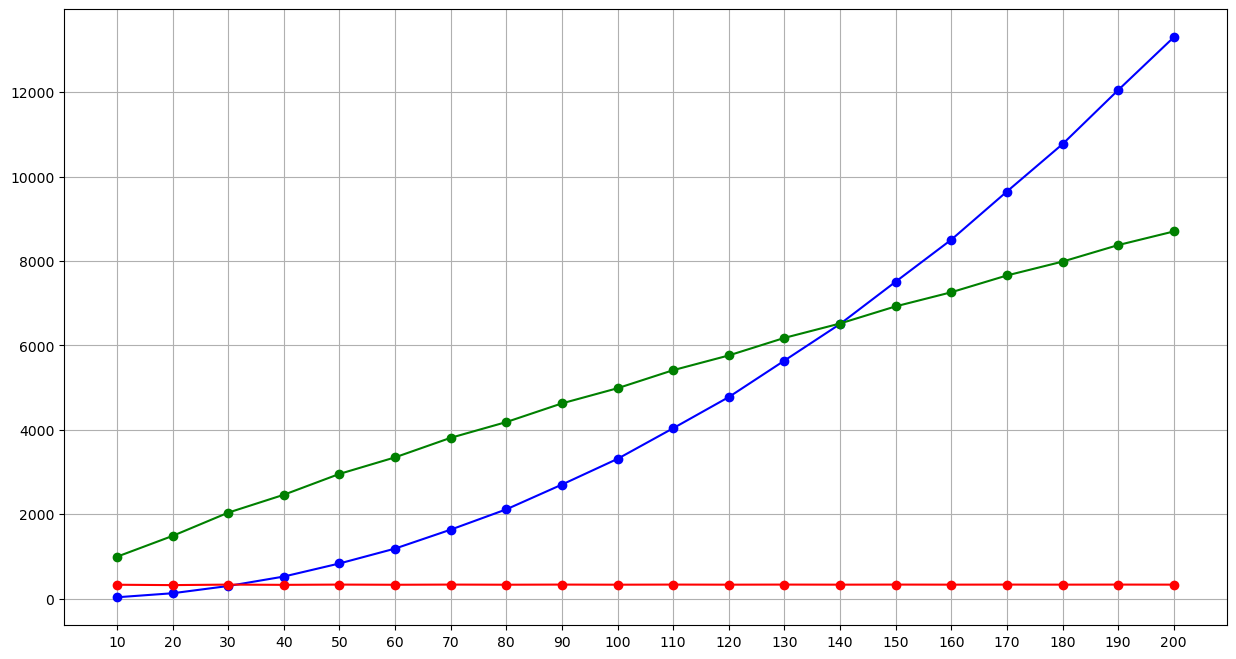

In [16]:
# test for selecting in sorted arrays
# find ARRAY_SIZES[0] values in all arrays, chose value in the middle of every ARRAY_SIZES[0]-th interval
# see calculation of k
results = []
for i in ARRAY_SIZES:
    intermediate_results = []
    for j in range(ARRAY_SIZES[0]):
        sorted_array = list(range(i))
        k = j * i // ARRAY_SIZES[0] + i // (ARRAY_SIZES[0] * 2)
        intermediate_results.append(select(sorted_array, k, outputStats=False))
    # calculate average and store it for output
    average = sum([res[8] for res in intermediate_results]) / len(intermediate_results)
    # prepare it such existing plot function can be used
    results.append((intermediate_results[0][0],0,0,0,0,0,0,0,average))
plot_results(results)

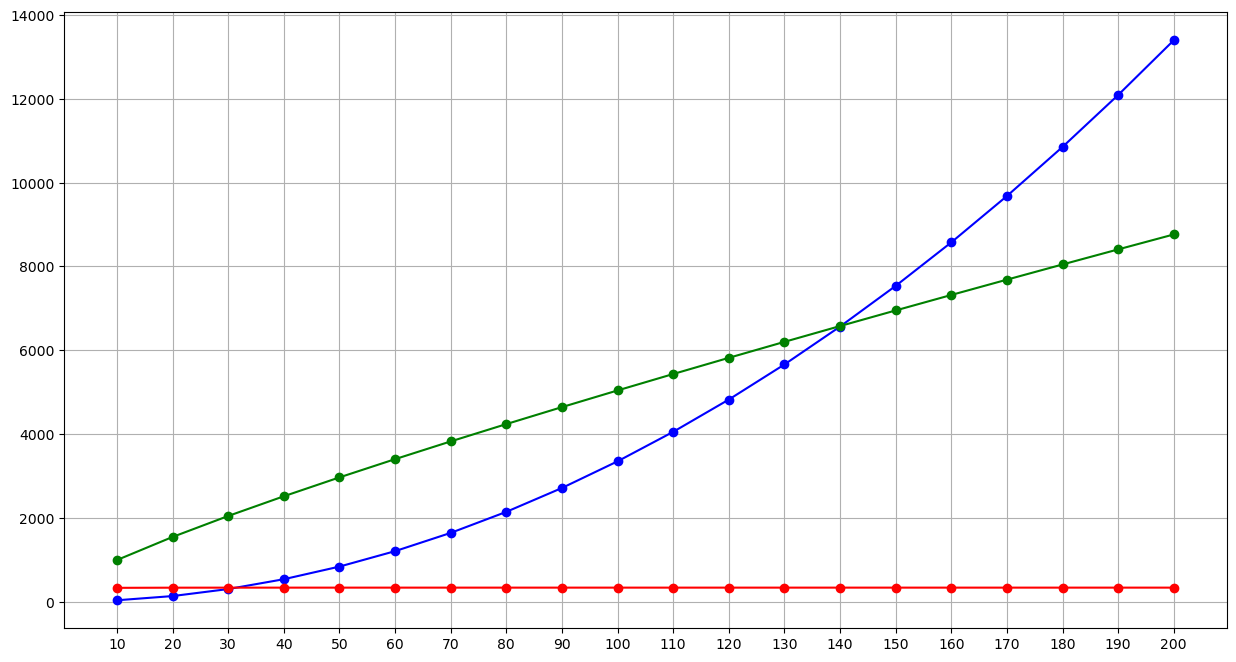

In [17]:
# test for selecting in reversly sorted arrays
# find ARRAY_SIZES[0] values in all arrays, chose value in the middle of every ARRAY_SIZES[0]-th interval
# see calculation of k
results = []
for i in ARRAY_SIZES:
    intermediate_results = []
    for j in range(ARRAY_SIZES[0]):
        reverse_sorted_array = list(range(i-1, -1, -1))
        k = j * i // ARRAY_SIZES[0] + i // (ARRAY_SIZES[0] * 2)
        intermediate_results.append(select(reverse_sorted_array, k, outputStats=False))
    # calculate average and store it for output
    average = sum([res[8] for res in intermediate_results]) / len(intermediate_results)
    # prepare it such existing plot function can be used
    results.append((intermediate_results[0][0],0,0,0,0,0,0,0,average))
plot_results(results)

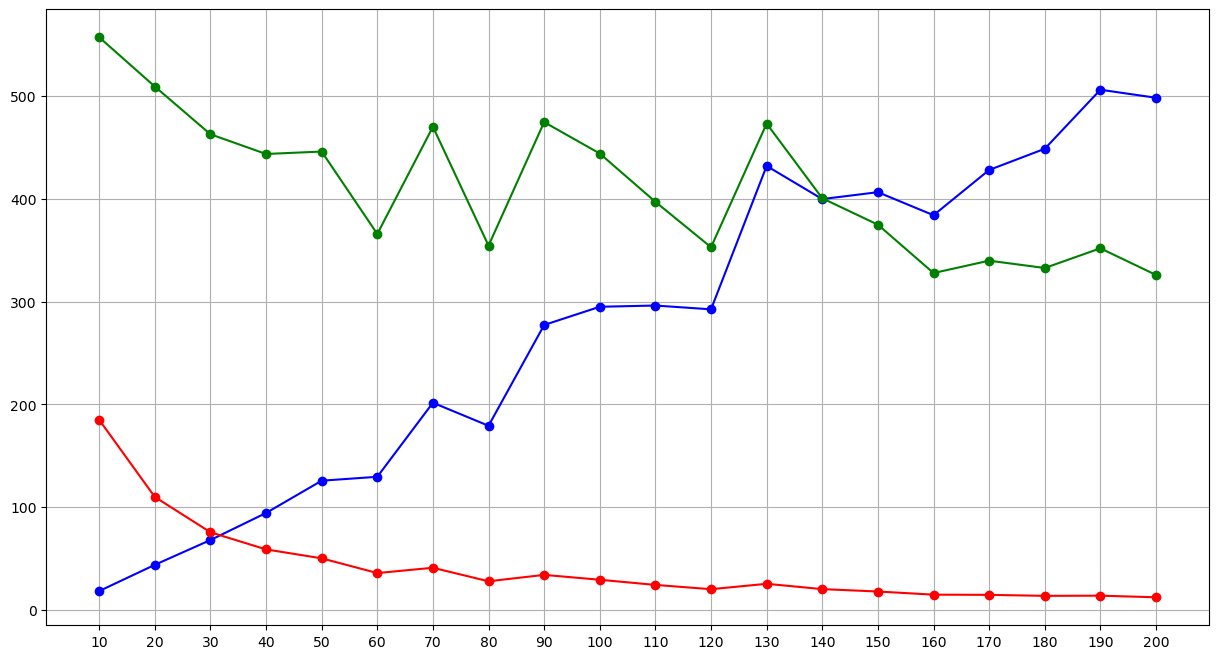

In [18]:
# test for selecting in random arrays
# find ARRAY_SIZES[0] values in all arrays, chose value in the middle of every ARRAY_SIZES[0]-th interval
# see calculation of k
results = []
for i in ARRAY_SIZES:
    intermediate_results = []
    for j in range(ARRAY_SIZES[0]):
        array = list(numpy.random.permutation(i))
        k = j * i // ARRAY_SIZES[0] + i // (ARRAY_SIZES[0] * 2)
        intermediate_results.append(select(array, k, outputStats=False))
    # calculate average and store it for output
    average = sum([res[8] for res in intermediate_results]) / len(intermediate_results)
    # prepare it such existing plot function can be used
    results.append((intermediate_results[0][0],0,0,0,0,0,0,0,average))
plot_results(results)

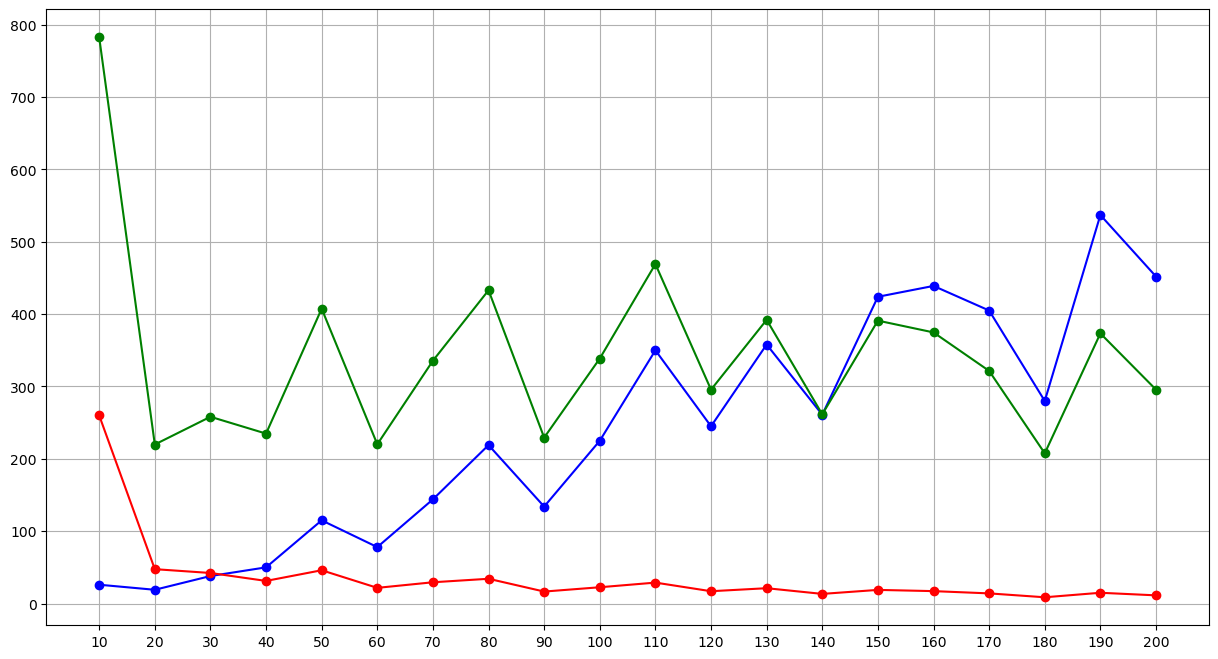

In [19]:
# test for selecting in random arrays with random k's
# perform several tests per array size and take the average value of the number of executions of for-loop
NUMBER_TESTS_PER_ARRAY_SIZE = 100
results = []
for i in ARRAY_SIZES:
    for j in range(NUMBER_TESTS_PER_ARRAY_SIZE):
        intermediate_results = []
        array = list(numpy.random.permutation(i))
        k = numpy.random.randint(i)
        intermediate_results.append(select(array, k, outputStats=False))
    # calculate average and store it for output
    average = sum([res[8] for res in intermediate_results]) / len(intermediate_results)
    # prepare it such existing plot function can be used
    results.append((intermediate_results[0][0],0,0,0,0,0,0,0,average))
plot_results(results)